## Домашнее задание

In [2]:
from sklearn.linear_model import LogisticRegression

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

sns.set(font_scale=1.5, style='whitegrid')

Задание просто: завершить работу с датасетом, который был на семинаре.

Вещественные переменные:
1. BMI - индекс массы
2. PhysicalHealth - сколько из последних 30 дней пациент чувствовал себя плохо
3. MentalHealth - сколько из последних 30 дней пациент чувствовал себя плохо физически
4. SleepTime - сколько спит в день


Бинарные переменные:
1. Smoking - выкурил ли человек за жизнь 100 сигарет
2. AlcoholDrinking - для мужчин: пьет 14 напитков в неделю, для женщин - больше 7
3. Stroke - был ли инсульт
4. DiffWalking - есть ли сложности с ходьбой или поднятием по лестнице
5. Sex - Male / Female
6. PhysicalActivity - в последние 30 дней занимались спортом больше, чем основной работой
7. Asthma - есть/была астма
8. KidneyDisease - были ли болезни почек (кроме камней, ...)
9. SkinCancer - был ли рак кожи

Категориальные переменные:
1. AgeCategory - возраст
2. Race - раса
3. Diabetic - есть/был диабет (Yes / No / ...)
5. GenHealth - как пациент оценивает свое здоровье

Таргет - HeartDisease - была ли ишемическая болезнь сердца либо инфаркт миокарда

In [3]:
train = pd.read_csv('./train.csv')
data_train = train.iloc[:, 1:]
target_train = train.iloc[:, 0]

val = pd.read_csv('./val.csv')
data_val = val.iloc[:, 1:]
target_val = val.iloc[:, 0]

test = pd.read_csv('./test.csv')
data_test = test.iloc[:, 1:]
target_test = test.iloc[:, 0]

C:\Users\user\miniconda3\lib\site-packages\IPython\core\interactiveshell.py:3155: DtypeWarning: Columns (1,5) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


**Напоминание:** На тестовой выборке только считаем итоговое качество. До этого ее использовать нельзя

Посмотрите, в каких признаках есть пропуски. В дальнейшем их придётся изучить подробнее.

In [26]:
for feature in data_test.columns:
    print(feature, pd.unique(data_train[feature]))

BMI [24.68 29.29 83.   ... 46.35 35.22 15.02]
Smoking [ 0.  1. nan]
AlcoholDrinking [0 1]
Stroke [0 1]
PhysicalHealth [ 0  3  7  1 10  5  2 15 30 20  8  4 28 25  6 14 12 21 24 22 16 13 29 18
 17 27 26  9 23 11 19]
MentalHealth [ 0. 30.  1.  2.  3.  4. 17. 10. 20. 14.  7.  8. 25. 11. 15.  5. 28. 12.
 29. 21.  6. 27. 26. 16. 18.  9. 23. 13. 22. 24. 19.]
DiffWalking [ 0.  1. nan]
Sex [0 1]
AgeCategory ['55-59' '65-69' '35-39' '45-49' '25-29' '30-34' '18-24' '75-79' '40-44'
 '50-54' '80 or older' '60-64' '70-74']
Race ['White' 'Asian' 'Other' 'Black' nan 'Hispanic'
 'American Indian/Alaskan Native']
Diabetic ['Yes (during pregnancy)' 'No' 'No, borderline diabetes' 'Yes']
PhysicalActivity [ 1.  0. nan]
GenHealth ['Good' 'Fair' 'Excellent' 'Very good' 'Poor']
SleepTime [ 7.  8.  6.  5.  9. nan 10.  4.  3.  2. 16. 11. 15. 12.  1. 14. 13. 18.
 20. 22. 24. 17. 19. 23.]
Asthma [0 1]
KidneyDisease [0 1]
SkinCancer [0 1]


In [5]:
pd.unique(target_train)

array(['No', 'Yes', 'e'], dtype=object)

Подумайте, какой природы могут быть пропуски. Возможно, описание признаков в этом поможет:)

Проведите первичную обработку признаков и таргета (для работы с sklearn таргет должен быть числом)

In [6]:
data_train.head(5)

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,24.68,No,No,No,0.0,0.0,No,Female,55-59,White,Yes (during pregnancy),Yes,Good,7.0,No,No,No
1,29.29,No,No,No,3.0,0.0,Yes,Female,65-69,Asian,No,Yes,Fair,8.0,Yes,No,No
2,83.0,Yes,Yes,No,0.0,0.0,No,Male,35-39,Other,No,Yes,Excellent,6.0,No,No,No
3,24.89,NaN,No,No,0.0,0.0,No,Female,45-49,White,No,Yes,Very good,6.0,Yes,No,No
4,27.98,No,No,No,7.0,30.0,No,Female,25-29,Black,No,No,Fair,7.0,No,No,No


In [7]:
del_i = target_train[target_train == 'e'].index[0]
data_train.drop(del_i, inplace=True)
target_train.drop(del_i, inplace=True)

In [8]:
YN_features = ['Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'PhysicalActivity', 'Asthma', 'KidneyDisease', 'SkinCancer']
for feat in YN_features:
    data_train[feat] = data_train[feat].map({'Yes': 1, 'No': 0})
data_train['Sex'] = data_train['Sex'].map({'Male': 1, 'Female': 0})
target_train = target_train.map({'Yes': 1, 'No': 0})

data_train['BMI'] = data_train['BMI'].apply(float)
data_train['PhysicalHealth'] = data_train['PhysicalHealth'].apply(float).apply(int)

In [9]:
YN_features = ['Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'PhysicalActivity', 'Asthma', 'KidneyDisease', 'SkinCancer']
for feat in YN_features:
    data_test[feat] = data_test[feat].map({'Yes': 1, 'No': 0})
data_test['Sex'] = data_test['Sex'].map({'Male': 1, 'Female': 0})
target_test = target_test.map({'Yes': 1, 'No': 0})

data_test['BMI'] = data_test['BMI'].apply(float)
data_test['PhysicalHealth'] = data_test['PhysicalHealth'].apply(float).apply(int)

In [10]:
YN_features = ['Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'PhysicalActivity', 'Asthma', 'KidneyDisease', 'SkinCancer']
for feat in YN_features:
    data_val[feat] = data_val[feat].map({'Yes': 1, 'No': 0})
data_val['Sex'] = data_val['Sex'].map({'Male': 1, 'Female': 0})
target_val = target_val.map({'Yes': 1, 'No': 0})

data_val['BMI'] = data_val['BMI'].apply(float)
data_val['PhysicalHealth'] = data_val['PhysicalHealth'].apply(float).apply(int)

### 1. WoE line

На семинаре использовалась готовая реализация для визуализации WoE. Здесь вам предстоит написать свою.
Для того, чтобы свериться, можно посмотреть на готовые реализации, в открытом доступе они есть.

Напомним формулу для оценки WoE:
$$
\operatorname{WoE}(x) = \ln\frac{\#\{\text{признак } = x \land Y = 1\}}{\#\{\text{признак } = x \land Y = 0\}} - \ln\frac{\#\{Y = 1\}}{\#\{ Y = 0\}}
$$

Для применения формулы потребуется дискретизовать вещественные признаки. Это можно делать с помощью функции ниже. Также могут пригодиться функции [pandas.cut](https://pandas.pydata.org/docs/reference/api/pandas.cut.html) или [pandas.qcut](https://pandas.pydata.org/docs/reference/api/pandas.qcut.html).

In [11]:
def make_bucket(feature, n=100):
    '''функция, бьющая на бакеты(по умолчанию 100 точек)'''
    return pd.DataFrame(feature).assign(bucket = np.ceil(feature.rank(pct=True) * n))

In [12]:
make_bucket(data_train['BMI'])

,BMI,bucket
0,24.68,30.0
1,29.29,65.0
2,83.00,100.0
3,24.89,32.0
4,27.98,55.0
...,...,...
206839,24.41,29.0
206840,27.96,55.0
206841,35.51,89.0
206842,29.86,68.0


In [13]:
len(data_train['BMI'][target_train==0 & True])

189322

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

def woe_line(x, y, n_buckets, feature_name, target_name):
    """ Строит график зависимости WoE
    x - параметр, от которого стоит искать зависимость
    y - метки класса (0 / 1)
    n_buckets - количество бинов для вещественного признака
    feature_name, target_name - подписи к графику
    """
    x_data = make_bucket(x, n_buckets)
    x_dots = []
    y_dots = []
    all_true = len(y[y == 1])
    all_false = len(y[y == 0])
    IV = 0
    for i in range(1, n_buckets+1):
        if len(x_data[(x_data['bucket'] == i)]) != 0:
            x_dots.append(x_data[feature_name][x_data['bucket'] == i].mean())
            a_true = len(x_data[(x_data['bucket'] == i) & (y == 1)])
            a_false = len(x_data[(x_data['bucket'] == i) & (y == 0)])
            y_dots.append(np.log(a_true/a_false) - np.log(all_true/all_false))
            IV += (np.log(a_true/a_false) - np.log(all_true/all_false)) * (a_true / all_true - a_false / all_false)
    plt.plot(x_dots,y_dots, 'ro--')
    LogR = LinearRegression()
    res=LogR.fit(np.array(x_dots).reshape(-1,1), np.array(y_dots).reshape(-1,1))
    y_preddots = res.predict(np.array(x_dots).reshape(-1,1))
    R2 = r2_score(y_dots, y_preddots)
    plt.plot(x_dots, y_preddots, c='b')
    plt.xlabel(feature_name)
    plt.ylabel('WoE')
    plt.title(f'{feature_name} | IV = {round(IV,3)}, R2 = {round(R2,3)}')
    plt.show()

**Bonus:** Можно дополнить функционал. Например, считать внутри функции IV или точку, в которой WoE равно 0.

### 2. Линеаризация признаков

Исследуйте зависимость от вещественных признаков для обучающей выборки. Это удобно делать на участке, где признак определен. При необходимости (а она, конечно, будет) произведите преобразования признаков

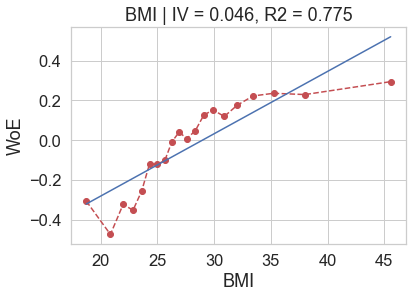

In [15]:
woe_line(data_train['BMI'], target_train, 20, 'BMI', 'target')


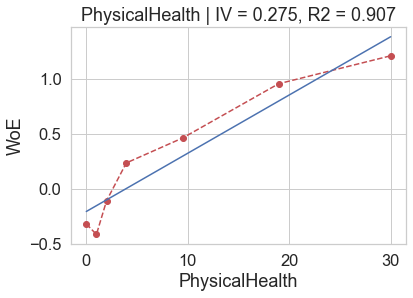

In [16]:
feat = 'PhysicalHealth'
woe_line(data_train[feat], target_train, 20, feat, 'target')

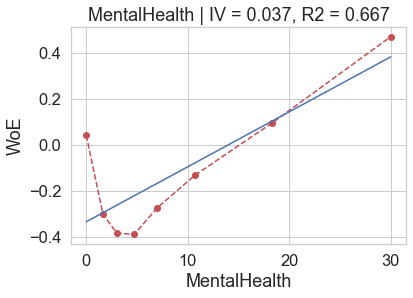

In [17]:
feat = 'MentalHealth'
woe_line(data_train[feat], target_train, 20, feat, 'target')

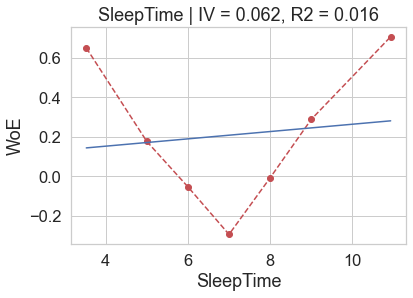

In [18]:
feat = 'SleepTime'
woe_line(data_train[feat], target_train, 20, feat, 'target')

Для конечного преобразования признаков удобно написать функцию, ведь преобразования для всех трех выборок должны быть одинаковыми:

In [19]:
def linearize_features(sample):
    """ Принимает pd.DataFrame и линеаризует вещественные фичи из него
    """
    out = pd.DataFrame()
    out['BMI_linearized'] = np.log(sample['BMI'].clip(22, 40))
    out['PhysicalHealth_linearized'] = np.sqrt(sample['PhysicalHealth'].clip(1,27))
    out['SleepTime_linearized'] = np.abs(sample['SleepTime'] - 7)
    
    return out

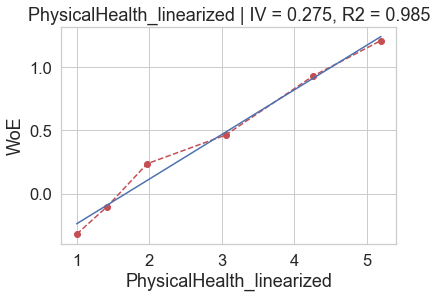

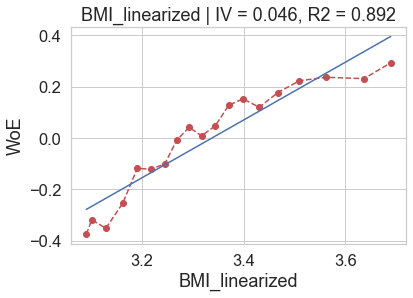

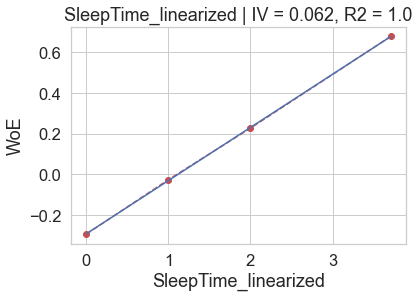

In [20]:
data_train_lin = linearize_features(data_train)
feat = 'PhysicalHealth_linearized'
woe_line(data_train_lin[feat], target_train, 20, feat, 'target')
woe_line(data_train_lin['BMI_linearized'], target_train, 20, 'BMI_linearized', 'target')
woe_line(data_train_lin['SleepTime_linearized'], target_train, 20, 'SleepTime_linearized', 'target')

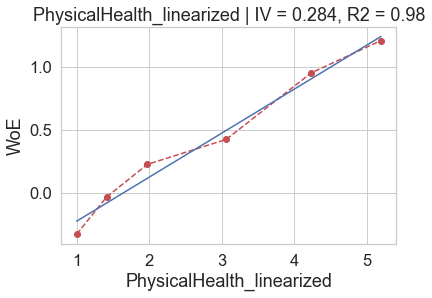

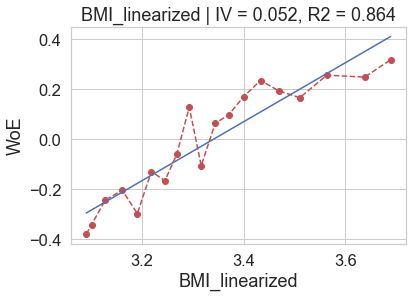

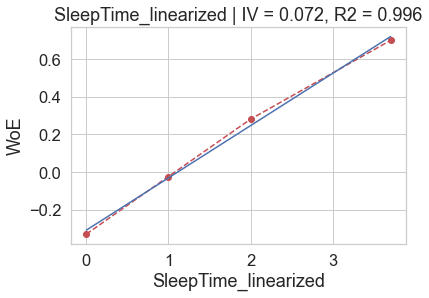

In [21]:
data_val_lin = linearize_features(data_val)
feat = 'PhysicalHealth_linearized'
woe_line(data_val_lin[feat], target_val, 20, feat, 'target')
woe_line(data_val_lin['BMI_linearized'], target_val, 20, 'BMI_linearized', 'target')
woe_line(data_val_lin['SleepTime_linearized'], target_val, 20, 'SleepTime_linearized', 'target')

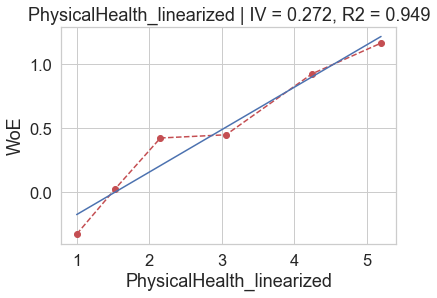

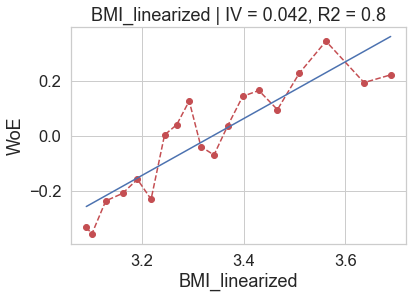

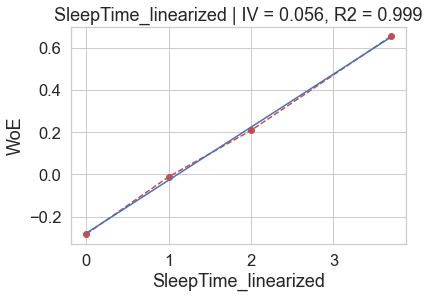

In [22]:
data_test_lin = linearize_features(data_test)
feat = 'PhysicalHealth_linearized'
woe_line(data_test_lin[feat], target_test, 20, feat, 'target')
woe_line(data_test_lin['BMI_linearized'], target_test, 20, 'BMI_linearized', 'target')
woe_line(data_test_lin['SleepTime_linearized'], target_test, 20, 'SleepTime_linearized', 'target')

### 3. Категориальные признаки

Обработайте категориальные признаки, в которых нет пропусков (здесь же можно обработать и бинарные признаки, если не сделали этого ранее). Можно пользоваться кодом из семинара

In [23]:
data_train[data_train['SleepTime'].isna()].index

Int64Index([    17,     25,     32,     35,     36,     39,     45,     55,
                60,     78,
            ...
            206800, 206806, 206807, 206817, 206819, 206827, 206829, 206832,
            206835, 206842],
           dtype='int64', length=31164)

In [24]:
data_train.isna().any()

BMI                 False
Smoking              True
AlcoholDrinking     False
Stroke              False
PhysicalHealth      False
MentalHealth        False
DiffWalking          True
Sex                 False
AgeCategory         False
Race                 True
Diabetic            False
PhysicalActivity     True
GenHealth           False
SleepTime            True
Asthma              False
KidneyDisease       False
SkinCancer          False
dtype: bool

Пропуски среди категориальных отсутствуют только в AgeCategory, Diabetic, GenHealth

In [27]:
data_train_lin

,BMI_linearized,PhysicalHealth_linearized,SleepTime_linearized
0,3.205993,1.000000,0.0
1,3.377246,1.732051,1.0
2,3.688879,1.000000,1.0
3,3.214466,1.000000,1.0
4,3.331490,2.645751,0.0
...,...,...,...
206839,3.194993,1.000000,3.0
206840,3.330775,1.000000,2.0
206841,3.569814,1.414214,1.0
206842,3.396520,1.000000,NaN


In [32]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse=False, drop='first')
data_train_encoded = encoder.fit_transform(data_train[['AgeCategory', 'GenHealth', 'Diabetic']])
data_val_encoded = encoder.fit_transform(data_val[['AgeCategory', 'GenHealth', 'Diabetic']])
data_test_encoded = encoder.fit_transform(data_test[['AgeCategory', 'GenHealth', 'Diabetic']])
encoder.categories_[:]

[array(['18-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54',
        '55-59', '60-64', '65-69', '70-74', '75-79', '80 or older'],
       dtype=object),
 array(['Excellent', 'Fair', 'Good', 'Poor', 'Very good'], dtype=object),
 array(['No', 'No, borderline diabetes', 'Yes', 'Yes (during pregnancy)'],
       dtype=object)]

In [33]:
data_train_encoded.shape

(206843, 19)

In [34]:
i = 0
for cat_array in encoder.categories_:
    for j, feat in enumerate(cat_array[1:]):
        data_train_lin[feat] = data_train_encoded[:,i].reshape(-1,1)
        data_val_lin[feat] = data_val_encoded[:,i].reshape(-1,1)
        data_test_lin[feat] = data_test_encoded[:,i].reshape(-1,1)
        i += 1
data_train_lin

,BMI_linearized,PhysicalHealth_linearized,SleepTime_linearized,25-29,30-34,35-39,40-44,45-49,50-54,55-59,...,70-74,75-79,80 or older,Fair,Good,Poor,Very good,"No, borderline diabetes",Yes,Yes (during pregnancy)
0,3.205993,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,3.377246,1.732051,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.688879,1.000000,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3.214466,1.000000,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,3.331490,2.645751,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206839,3.194993,1.000000,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
206840,3.330775,1.000000,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
206841,3.569814,1.414214,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
206842,3.396520,1.000000,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


### 4. Обработка пропусков

Некоторые признаки, как вещественные, так и категориальные, имеют пропуски. Подумайте над природой пропусков и исходя из этого обработайте их.

**Важно:**
1. Не факт, что добавлять везде флаг пропуска хорошо. Это может сильно увеличить число переменных, а данных для обучения модели на флаге может быть и недостаточно.
2. Возможно, некоторые значения признаков стоит проинтерпретировать как пропуски. С этим можно поэкспериментировать

In [31]:
data_train.isna().any()

BMI                 False
Smoking              True
AlcoholDrinking     False
Stroke              False
PhysicalHealth      False
MentalHealth        False
DiffWalking          True
Sex                 False
AgeCategory         False
Race                 True
Diabetic            False
PhysicalActivity     True
GenHealth           False
SleepTime            True
Asthma              False
KidneyDisease       False
SkinCancer          False
dtype: bool

In [35]:
for feature in data_test.columns:
    print(feature, pd.unique(data_train[feature]))

BMI [24.68 29.29 83.   ... 46.35 35.22 15.02]
Smoking [ 0.  1. nan]
AlcoholDrinking [0 1]
Stroke [0 1]
PhysicalHealth [ 0  3  7  1 10  5  2 15 30 20  8  4 28 25  6 14 12 21 24 22 16 13 29 18
 17 27 26  9 23 11 19]
MentalHealth [ 0. 30.  1.  2.  3.  4. 17. 10. 20. 14.  7.  8. 25. 11. 15.  5. 28. 12.
 29. 21.  6. 27. 26. 16. 18.  9. 23. 13. 22. 24. 19.]
DiffWalking [ 0.  1. nan]
Sex [0 1]
AgeCategory ['55-59' '65-69' '35-39' '45-49' '25-29' '30-34' '18-24' '75-79' '40-44'
 '50-54' '80 or older' '60-64' '70-74']
Race ['White' 'Asian' 'Other' 'Black' nan 'Hispanic'
 'American Indian/Alaskan Native']
Diabetic ['Yes (during pregnancy)' 'No' 'No, borderline diabetes' 'Yes']
PhysicalActivity [ 1.  0. nan]
GenHealth ['Good' 'Fair' 'Excellent' 'Very good' 'Poor']
SleepTime [ 7.  8.  6.  5.  9. nan 10.  4.  3.  2. 16. 11. 15. 12.  1. 14. 13. 18.
 20. 22. 24. 17. 19. 23.]
Asthma [0 1]
KidneyDisease [0 1]
SkinCancer [0 1]


In [41]:
LogRes = LogisticRegression()
for feat in ['SleepTime_linearized', 'BMI_linearized', 'PhysicalHealth_linearized']:
    X = data_train_lin[feat][(data_train_lin[feat].notna())]
    y = target_train[(data_train_lin[feat].notna())]
    LogRes.fit(np.array(X).reshape(-1,1), np.array(y).reshape(-1,1))
    all_true = (y==1).sum() / len(y)
    all_false = 1 - all_true
    x0 = (np.log(all_true/all_false) - LogRes.intercept_[0]) / LogRes.coef_[0]
    x0 = x0[0]
    data_train_lin[feat].fillna(x0, inplace=True)
    data_val_lin[feat].fillna(x0, inplace=True)
    data_test_lin[feat].fillna(x0, inplace=True)

for feat in ['Smoking', 'DiffWalking', 'PhysicalActivity']:
    X = data_train[feat][(data_train[feat].notna())]
    y = target_train[(data_train[feat].notna())]
    LogRes.fit(np.array(X).reshape(-1,1), np.array(y).reshape(-1,1))
    all_true = (y==1).sum() / len(y)
    all_false = 1 - all_true
    x0 = (np.log(all_true/all_false) - LogRes.intercept_[0]) / LogRes.coef_[0]
    x0 = x0[0]
    data_train_lin[feat] = data_train[feat].fillna(x0)
    data_val_lin[feat] = data_val[feat].fillna(x0)
    data_test_lin[feat] = data_test[feat].fillna(x0)

C:\Users\user\miniconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\user\miniconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\user\miniconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\user\miniconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using r

In [42]:
feat='Race'
data_train_lin[feat] = data_train[feat].fillna('Other')
data_val_lin[feat] = data_val[feat].fillna('Other')
data_test_lin[feat] = data_test[feat].fillna('Other')

In [43]:
for feature in data_train_lin.columns:
    print(feature, pd.unique(data_train_lin[feature]))

BMI_linearized [3.2059932  3.37724616 3.68887945 ... 3.34568467 3.66663385 3.5616141 ]
PhysicalHealth_linearized [1.         1.73205081 2.64575131 3.16227766 2.23606798 1.41421356
 3.87298335 5.19615242 4.47213595 2.82842712 2.         5.
 2.44948974 3.74165739 3.46410162 4.58257569 4.89897949 4.69041576
 4.         3.60555128 4.24264069 4.12310563 5.09901951 3.
 4.79583152 3.31662479 4.35889894]
SleepTime_linearized [ 0.          1.          2.          1.09582937  3.          4.
  5.          9.          8.          6.          7.         11.
 13.         15.         17.         10.         12.         16.        ]
25-29 [0. 1.]
30-34 [0. 1.]
35-39 [0. 1.]
40-44 [0. 1.]
45-49 [0. 1.]
50-54 [0. 1.]
55-59 [1. 0.]
60-64 [0. 1.]
65-69 [0. 1.]
70-74 [0. 1.]
75-79 [0. 1.]
80 or older [0. 1.]
Fair [0. 1.]
Good [1. 0.]
Poor [0. 1.]
Very good [0. 1.]
No, borderline diabetes [0. 1.]
Yes [0. 1.]
Yes (during pregnancy) [1. 0.]
Smoking [0.         1.         0.49118478]
DiffWalking [0.         1.

In [44]:
data_train_lin

,BMI_linearized,PhysicalHealth_linearized,SleepTime_linearized,25-29,30-34,35-39,40-44,45-49,50-54,55-59,...,Good,Poor,Very good,"No, borderline diabetes",Yes,Yes (during pregnancy),Smoking,DiffWalking,PhysicalActivity,Race
0,3.205993,1.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.0,1.000000,White
1,3.377246,1.732051,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,1.000000,Asian
2,3.688879,1.000000,1.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.0,1.000000,Other
3,3.214466,1.000000,1.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.491185,0.0,1.000000,White
4,3.331490,2.645751,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,Black
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206839,3.194993,1.000000,3.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,1.000000,White
206840,3.330775,1.000000,2.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.0,0.739273,White
206841,3.569814,1.414214,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.739273,White
206842,3.396520,1.000000,1.095829,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.000000,0.0,0.000000,Black


Так как пропуски в категориальном признаке Race было решено заменить на Other, требуется провести OneHotEncoding этого признака

In [45]:
encoder = OneHotEncoder(sparse=False, drop='first')
data_train_encoded = encoder.fit_transform(data_train_lin[['Race']])
data_val_encoded = encoder.fit_transform(data_val_lin[['Race']])
data_test_encoded = encoder.fit_transform(data_test_lin[['Race']])
encoder.categories_[:]

[array(['American Indian/Alaskan Native', 'Asian', 'Black', 'Hispanic',
        'Other', 'White'], dtype=object)]

In [46]:
i = 0
for cat_array in encoder.categories_:
    for j, feat in enumerate(cat_array[1:]):
        data_train_lin[feat] = data_train_encoded[:,i].reshape(-1,1)
        data_val_lin[feat] = data_val_encoded[:,i].reshape(-1,1)
        data_test_lin[feat] = data_test_encoded[:,i].reshape(-1,1)
        i += 1
data_train_lin

,BMI_linearized,PhysicalHealth_linearized,SleepTime_linearized,25-29,30-34,35-39,40-44,45-49,50-54,55-59,...,Yes (during pregnancy),Smoking,DiffWalking,PhysicalActivity,Race,Asian,Black,Hispanic,Other,White
0,3.205993,1.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.000000,0.0,1.000000,White,0.0,0.0,0.0,0.0,1.0
1,3.377246,1.732051,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,1.0,1.000000,Asian,1.0,0.0,0.0,0.0,0.0
2,3.688879,1.000000,1.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.000000,0.0,1.000000,Other,0.0,0.0,0.0,1.0,0.0
3,3.214466,1.000000,1.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.491185,0.0,1.000000,White,0.0,0.0,0.0,0.0,1.0
4,3.331490,2.645751,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,Black,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206839,3.194993,1.000000,3.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,1.000000,White,0.0,0.0,0.0,0.0,1.0
206840,3.330775,1.000000,2.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.000000,0.0,0.739273,White,0.0,0.0,0.0,0.0,1.0
206841,3.569814,1.414214,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.000000,0.0,0.739273,White,0.0,0.0,0.0,0.0,1.0
206842,3.396520,1.000000,1.095829,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,Black,0.0,1.0,0.0,0.0,0.0


In [50]:
data_train_lin.drop(columns='Race', inplace=True)
data_val_lin.drop(columns='Race', inplace=True)
data_test_lin.drop(columns='Race', inplace=True)

### 5. Обучение модели

Обучите [LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) на обучающей выборке

In [57]:
len(data_train_lin)
len(target_train)

206843

In [97]:
X_train = data_train_lin
y_train = target_train
model = LogisticRegression(penalty='none', max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, penalty='none')

Посчитайте предсказания на валидационной выборке. Можно пользоваться кодом из семинара

In [78]:
pred_val = model.predict_proba(data_val_lin)

Постройте ROC кривую для валидационной выборки и посчитайте ROC AUC. Можно воспользоваться кодом из семинара или реализацией в sklearn ([ROC кривая](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html), [ROC AUC](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html)).

0.8253957918689174

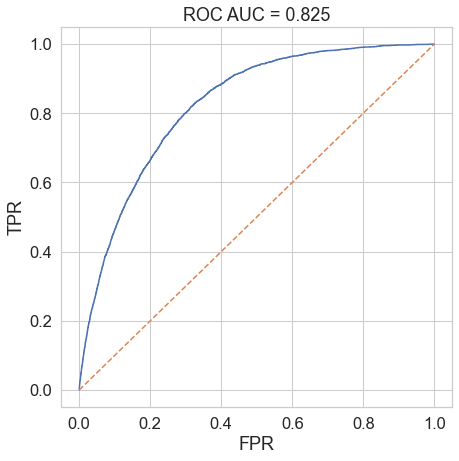

In [81]:
def roc_auc(y_true, y_pred):
    """Считает ROC AUC
    y_true - метки классов (0/1)
    y_pred - предсказания модели
    """
    n1_all = np.sum(y_true)
    n0_all = len(y_true) - n1_all
    
    df = pd.DataFrame()
    df['y_true'] = y_true
    df['y_pred'] = y_pred
    
    df = df.groupby('y_pred').agg({'y_true' : ['sum', 'count']})
    df.iloc[:, 1] -= df.iloc[:, 0]
    df.columns = ['n1', 'n0']
    
    #df = df.sort_values('y_pred', ascending=False)
    
    df = df.iloc[::-1, :]
    
    tpr = [0]
    fpr = [0]
    roc_auc = 0.0
    
    for i in range(len(df)):
        tpr.append(tpr[-1] + df.iloc[i]['n1'] / n1_all)
        fpr.append(fpr[-1] + df.iloc[i]['n0'] / n0_all)
        roc_auc += (fpr[-1] - fpr[-2]) * (tpr[-1] + tpr[-2]) / 2
        
    plt.figure(figsize=(7, 7))
    plt.plot(fpr, tpr)
    plt.plot([0, 1], [0, 1], ls='--')
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title(f'ROC AUC = {roc_auc:.3f}')
        
    return roc_auc

roc_auc(target_val, pred_val[:,1])

Попробуйте также обучить не на всех признаках (например, можно взять N признаков с самым большим IV). Более подробно про отбор признаков будет рассказано в дальнейшем

In [90]:
data_train_lin.columns

Index(['BMI_linearized', 'PhysicalHealth_linearized', 'SleepTime_linearized',
       '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64',
       '65-69', '70-74', '75-79', '80 or older', 'Fair', 'Good', 'Poor',
       'Very good', 'No, borderline diabetes', 'Yes', 'Yes (during pregnancy)',
       'Smoking', 'DiffWalking', 'PhysicalActivity', 'Asian', 'Black',
       'Hispanic', 'Other', 'White'],
      dtype='object')

0.8254128404876104

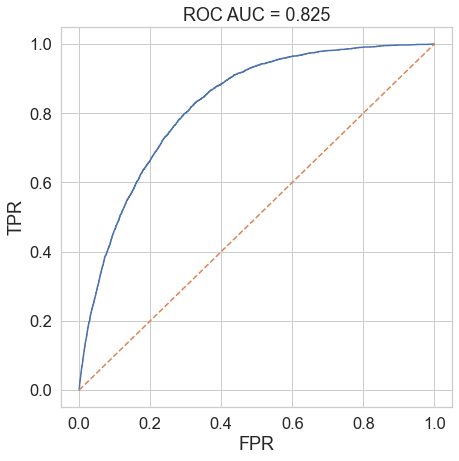

In [106]:
change = lambda x: x.drop(columns=['Other'])

model.fit(change(X_train), y_train)
pred_val = model.predict_proba(change(data_val_lin))
roc_auc(target_val, pred_val[:,1])

### 6. Измерение качества на тестовой выборке

Выберите какую-то из моделей, которые вы обучили раннее, и посчитайте ее предсказания на тестовой выборке.

In [108]:
from sklearn.metrics import roc_auc_score, f1_score, balanced_accuracy_score
pred_test = model.predict_proba(change(data_test_lin))[:,1]

print(f'roc auc = {roc_auc_score(target_test, pred_test)}')

roc auc = 0.8176244627472267
